In [1]:
from keras.datasets import cifar10
import numpy as np
import skimage.io as io
from skimage import data,color
import matplotlib.pyplot as plt
from skimage import data_dir,transform
np.random.seed(10)
%matplotlib inline

Using TensorFlow backend.


D:\Users\admin\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(440, 128, 128, 3)


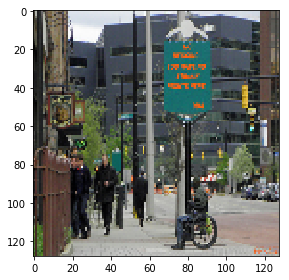

In [33]:
str='D:\\Desktop\\image\\train/*.jpg'
def convert_gray(f):
    rgb=io.imread(f)
    #rgb=color.rgb2gray(rgb)
    return transform.resize(rgb,(128,128))
coll = io.ImageCollection(str,load_func=convert_gray)


coll=np.array(coll)

print(coll.shape)
io.imshow(coll[130])

D:\Users\admin\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(50, 128, 128, 3)


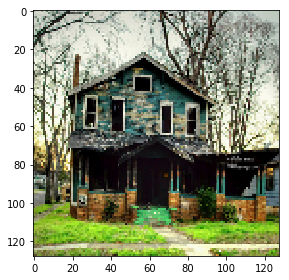

In [34]:
str='D:\\Desktop\\image\\test/*.jpg'
def convert_gray(f):
    rgb=io.imread(f)
    return transform.resize(rgb,(128,128))
coll1 = io.ImageCollection(str,load_func=convert_gray)


coll1=np.array(coll1)
print(coll1.shape)
io.imshow(coll1[2])

In [35]:
x_img_train = coll
y_label_train =np.zeros(440)
y_label_train[220:440] = 1

x_img_test = coll1
y_label_test = np.zeros(50)
y_label_test[25:50] = 1
print(y_label_train[19])
print(y_label_train[19])

0.0
0.0


In [36]:
print('train:',len(x_img_train))
print('test:',len(x_img_test))

train: 440
test: 50


In [37]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [38]:
print(y_label_train)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

In [39]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
print(y_label_test_OneHot)

[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]


In [40]:
index = [i for i in range(len(x_img_train_normalize))]    
np.random.shuffle(index)   
x_img_train_normalize = x_img_train_normalize[index]  
y_label_train_OneHot = y_label_train_OneHot[index]  
print(y_label_train_OneHot)
#io.imshow(coll[3])

[[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]

In [41]:
index = [i for i in range(len(x_img_test_normalize))]    
np.random.shuffle(index)   
x_img_test_normalize = x_img_test_normalize[index]  
y_label_test_OneHot = y_label_test_OneHot[index]  
print(y_label_test_OneHot)
#io.imshow(coll1[3])

[[ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]]


In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, Adam

In [43]:
model = Sequential()

In [44]:
model.add(Conv2D(filters=64,kernel_size=(5,5),
         input_shape=(128,128,3),
         activation='relu',
         padding='same'))

In [45]:
model.add(Dropout(rate=0.25))
#model.add(Conv2D(filters=32, kernel_size=(3,3),
                                        #activation='relu',padding='same'))

In [46]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [47]:
model.add(Conv2D(filters=64,kernel_size=(5, 5),
                activation='relu',padding='same'))

In [48]:
model.add(Dropout(0.25))
#model.add(Conv2D(filters=64, kernel_size=(3,3),
                                        #activation='relu',padding='same'))

In [49]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [50]:
#model.add(Conv2D(filters=128,kernel_size=(3, 3),
                #activation='relu',padding='same'))
#model.add(Dropout(0.3))
#model.add(Conv2D(filters=128,kernel_size=(3, 3),
                #activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

In [51]:
model.add(Flatten())

In [52]:
model.add(Dropout(rate=0.25))

In [53]:
#model.add(Dense(2500, activation='relu'))
#model.add(Dropout(rate=0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [54]:
model.add(Dense(2, activation='softmax'))

In [55]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 64)      4864      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        102464    
_________________________________________________________________
dropout_6 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 65536)             0         
__________

In [25]:
#sgd = Adam(lr=0.5)
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [26]:
train_history=model.fit(x_img_train_normalize,y_label_train_OneHot,
                       validation_split=0.2,
                       epochs=100, batch_size=128,verbose=1)

Train on 352 samples, validate on 88 samples
Epoch 1/100
352/352 [==============================] - 14s - loss: 0.6940 - acc: 0.5142 - val_loss: 0.6937 - val_acc: 0.4773
Epoch 2/100
352/352 [==============================] - 0s - loss: 0.6932 - acc: 0.5057 - val_loss: 0.6942 - val_acc: 0.4773
Epoch 3/100
352/352 [==============================] - 0s - loss: 0.6933 - acc: 0.5057 - val_loss: 0.6936 - val_acc: 0.4773
Epoch 4/100
352/352 [==============================] - 0s - loss: 0.6935 - acc: 0.5057 - val_loss: 0.6940 - val_acc: 0.4773
Epoch 5/100
352/352 [==============================] - 0s - loss: 0.6931 - acc: 0.5057 - val_loss: 0.6932 - val_acc: 0.4773
Epoch 6/100
352/352 [==============================] - 0s - loss: 0.6929 - acc: 0.5312 - val_loss: 0.6931 - val_acc: 0.4773
Epoch 7/100
352/352 [==============================] - 0s - loss: 0.6930 - acc: 0.5199 - val_loss: 0.6933 - val_acc: 0.4773
Epoch 8/100
352/352 [==============================] - 0s - loss: 0.6927 - acc: 0.5057

In [28]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    #plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

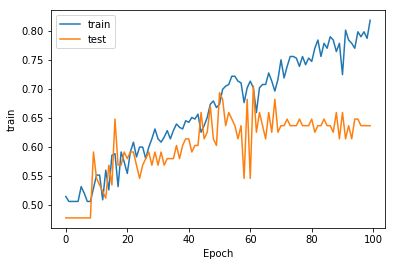

In [29]:
show_train_history(train_history,'acc','val_acc')

In [30]:
predict = model.evaluate(x_img_train_normalize,
                       y_label_train_OneHot, verbose=0)

In [32]:
#io.imshow(coll[130])
print("positive ：" )
predict[1]

positive ：


0.76818181926553897